In [2]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import seaborn as sns
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

**importing dataset**

In [3]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')
train_original=train.copy()
test_original=test.copy()
valid_original=valid.copy()

**Aanaysis the data set**

In [4]:
train_original.shape

(28520, 260)

In [5]:
train_original.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_251', 'feature_252', 'feature_253', 'feature_254',
       'feature_255', 'feature_256', 'label_1', 'label_2', 'label_3',
       'label_4'],
      dtype='object', length=260)

In [6]:
train_original.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [7]:
missing_counts = train_original.isnull().sum()
for column, count in missing_counts.items():
  if count>0:
    print(f"Column '{column}': {count} missing values")

Column 'label_2': 480 missing values


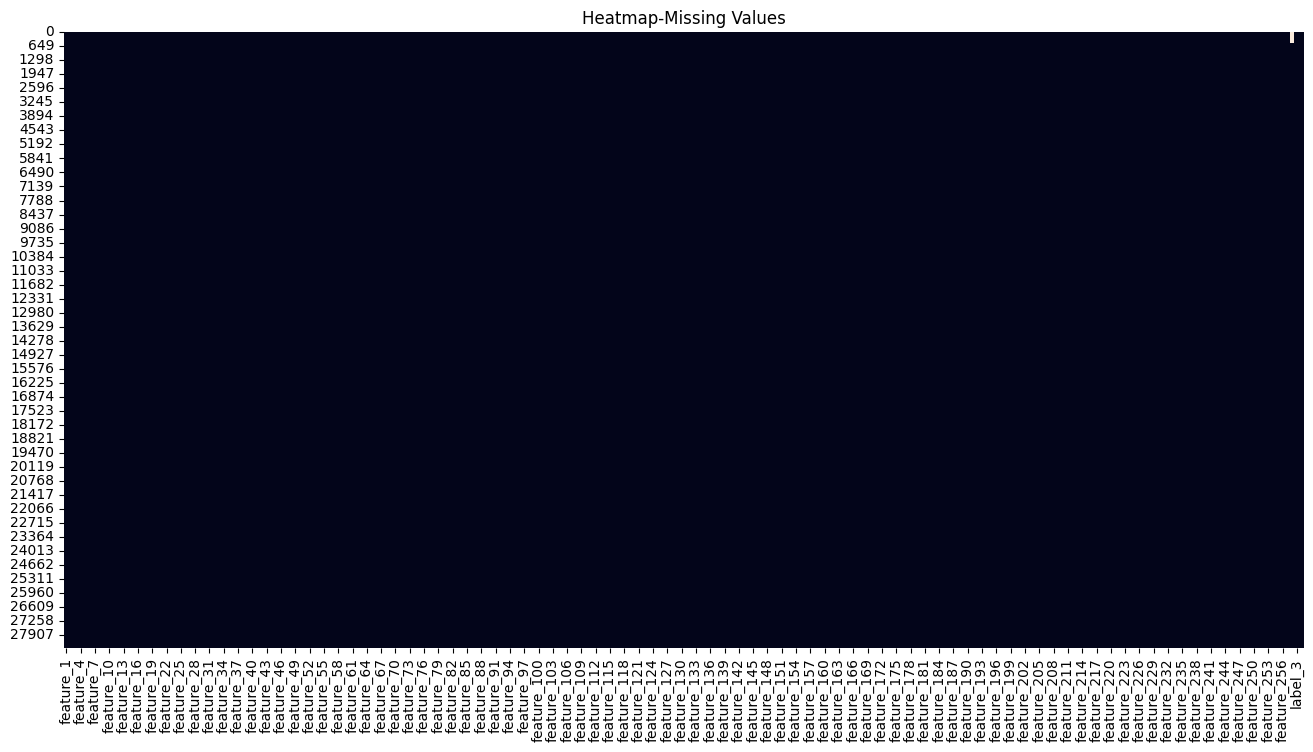

In [8]:
# Creating a heatmap from seaborn
missing_values = train_original.isnull()
plt.figure(figsize=(16, 8))
sns.heatmap(missing_values, cbar=False)
plt.title("Heatmap-Missing Values")
plt.show()

**Dealing with missing value**

In [9]:
# dropping the label2
df_clean = train_original.drop(columns='label_2')
df_clean.reset_index(drop = True, inplace = True)

In [10]:
# Dropping rows with missing values
df_clean = df_clean.dropna()
df_clean.reset_index(drop = True, inplace = True)

In [11]:
df_clean.shape

(28520, 259)

**Analysis the label**

In [12]:
pd.Series(df_clean['label_1']).value_counts()

12    485
35    484
26    483
60    482
24    482
25    481
59    481
10    481
54    481
45    480
41    480
9     480
2     479
42    479
47    479
6     479
56    479
34    478
52    478
3     478
14    478
33    478
43    477
1     477
13    477
20    477
23    477
30    476
51    476
32    476
53    476
22    476
38    476
49    476
55    475
28    474
8     474
40    474
48    474
21    474
4     474
39    473
17    473
7     473
15    472
58    472
5     471
27    471
31    470
19    469
11    469
46    469
29    469
36    468
16    468
50    467
37    467
44    467
57    466
18    465
Name: label_1, dtype: int64

In [13]:
pd.Series(train_original['label_2']).value_counts()

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: label_2, dtype: int64

In [14]:
pd.Series(train_original['label_3']).value_counts()

1    22796
0     5724
Name: label_3, dtype: int64

In [15]:
pd.Series(train_original['label_4']).value_counts()

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: label_4, dtype: int64

Bar Chart for label 1

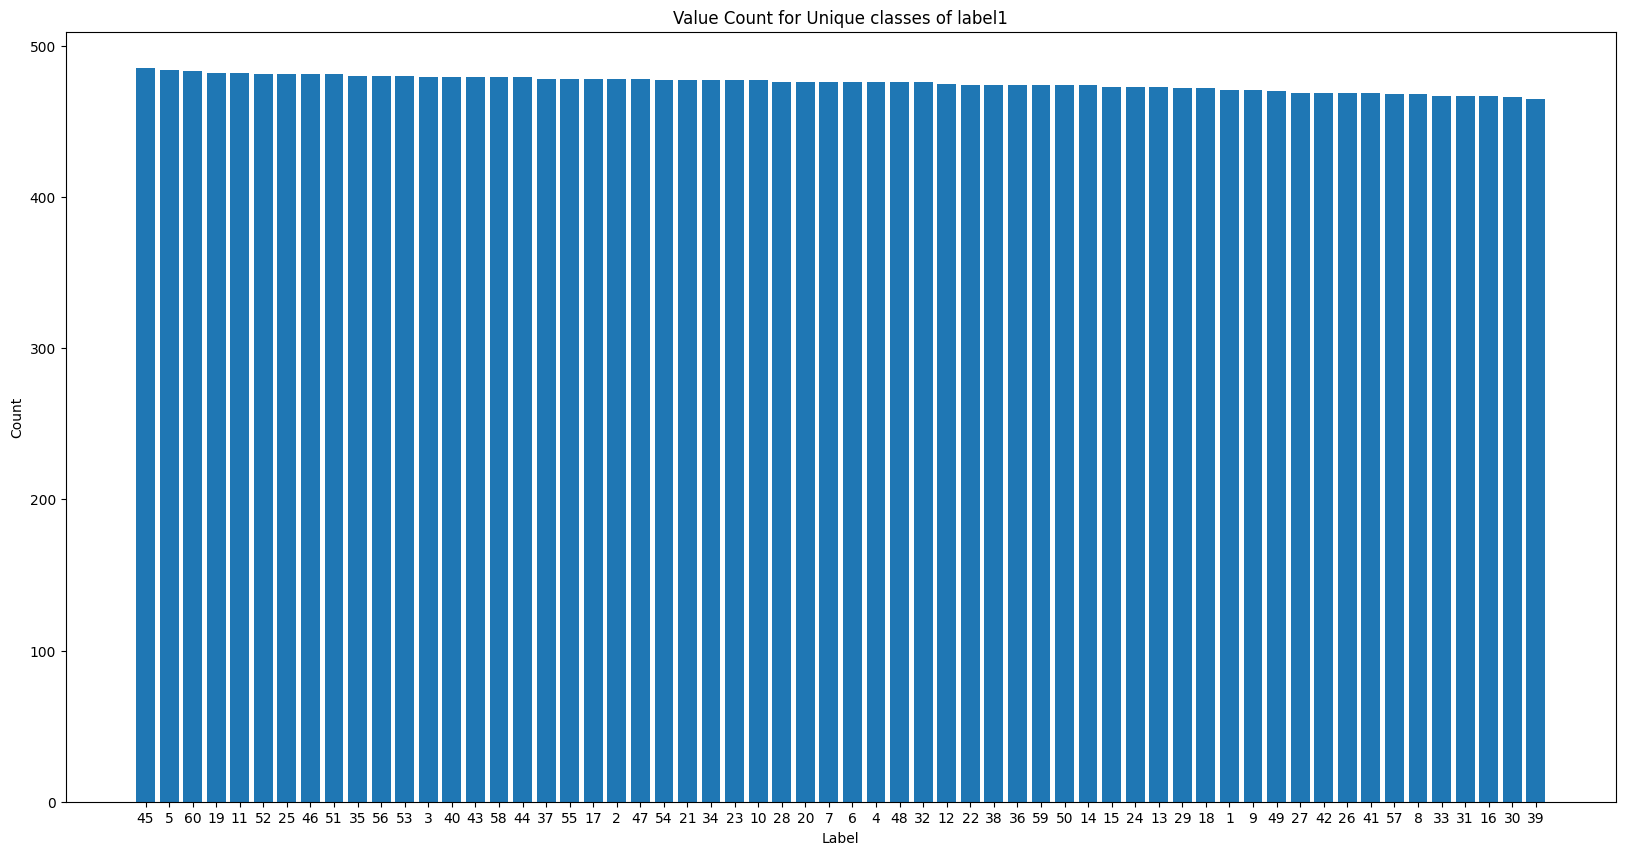

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
unique_labels = df_clean['label_1'].unique()
unique_labels=unique_labels.astype(str)
label_counts = df_clean['label_1'].value_counts()
plt.bar(unique_labels, label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Count for Unique classes of label1')

# Show the plot
plt.show()

Bar Chart for label 2

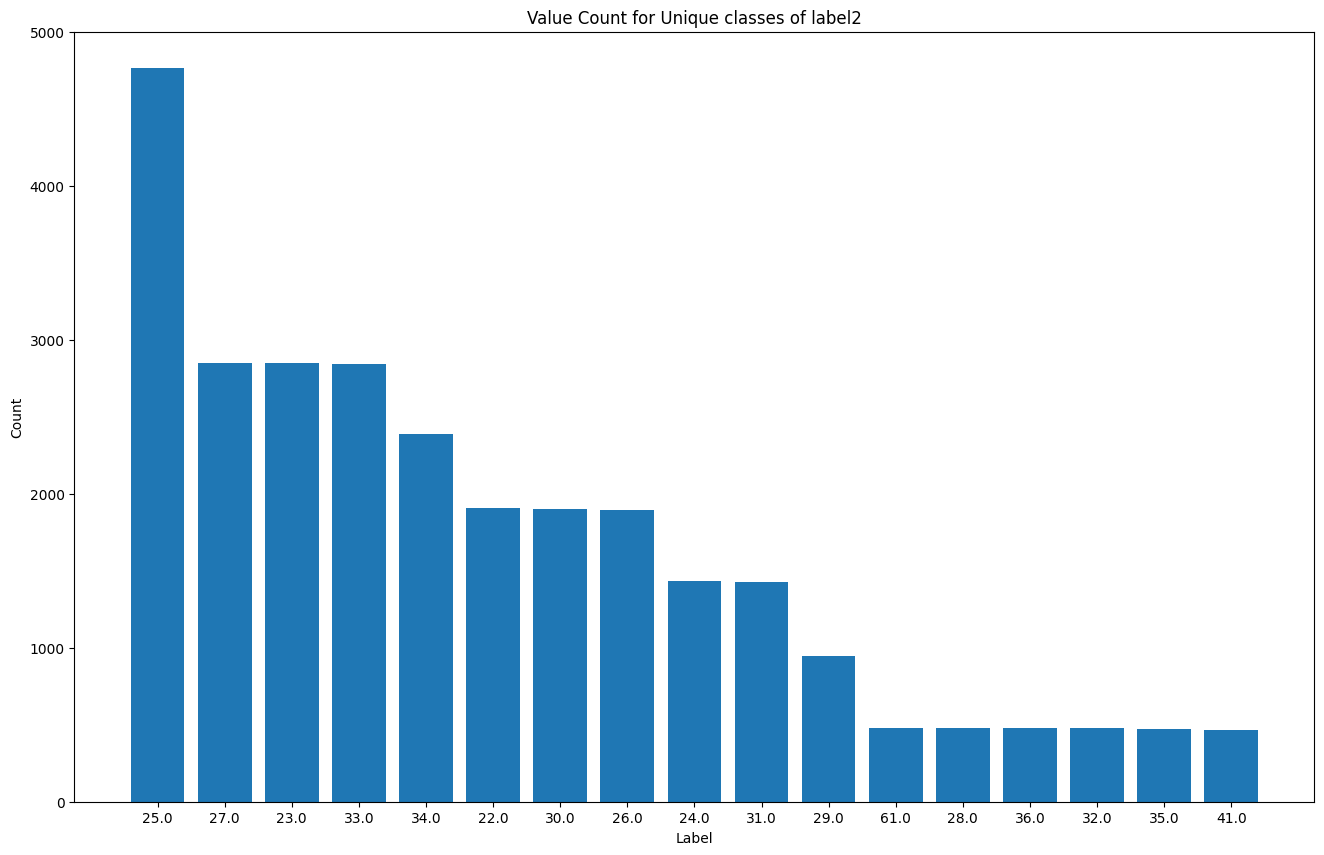

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16, 10))
unique_labels = train_original['label_2'].unique()
n_mask = np. isnan(unique_labels)
unique_labels=unique_labels[~n_mask]
unique_labels=unique_labels.astype(str)
label_counts = train_original['label_2'].value_counts()
plt.bar(unique_labels, label_counts)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Count for Unique classes of label2')

# Show the plot
plt.show()

Bar Chart for label 3

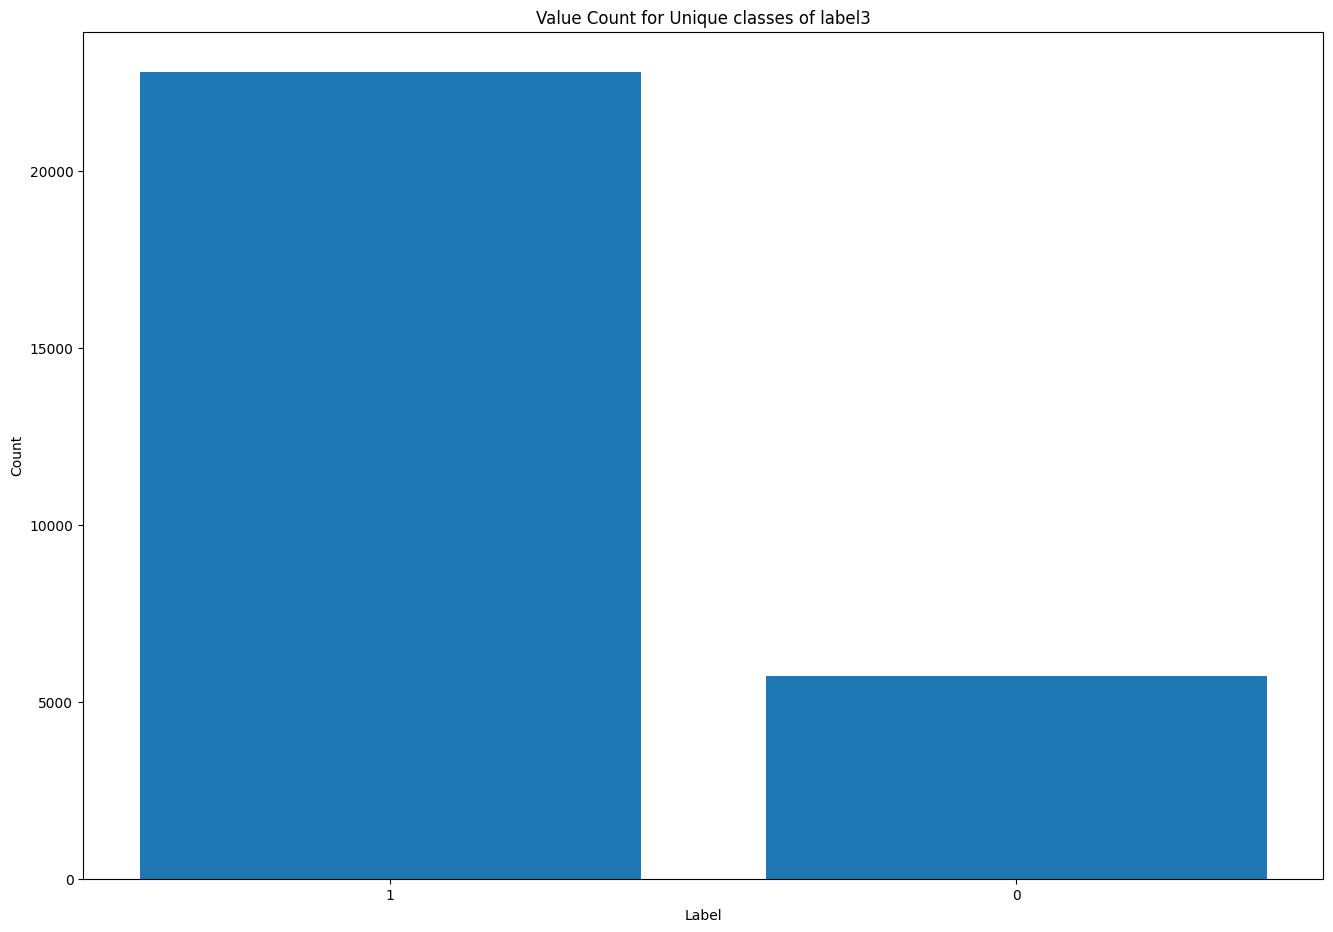

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 11))
unique_labels = df_clean['label_3'].unique()
unique_labels=unique_labels.astype(str)
label_counts = df_clean['label_3'].value_counts()

plt.bar(unique_labels, label_counts)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Count for Unique classes of label3')

# Show the plot
plt.show()

Bar Chart for label 4

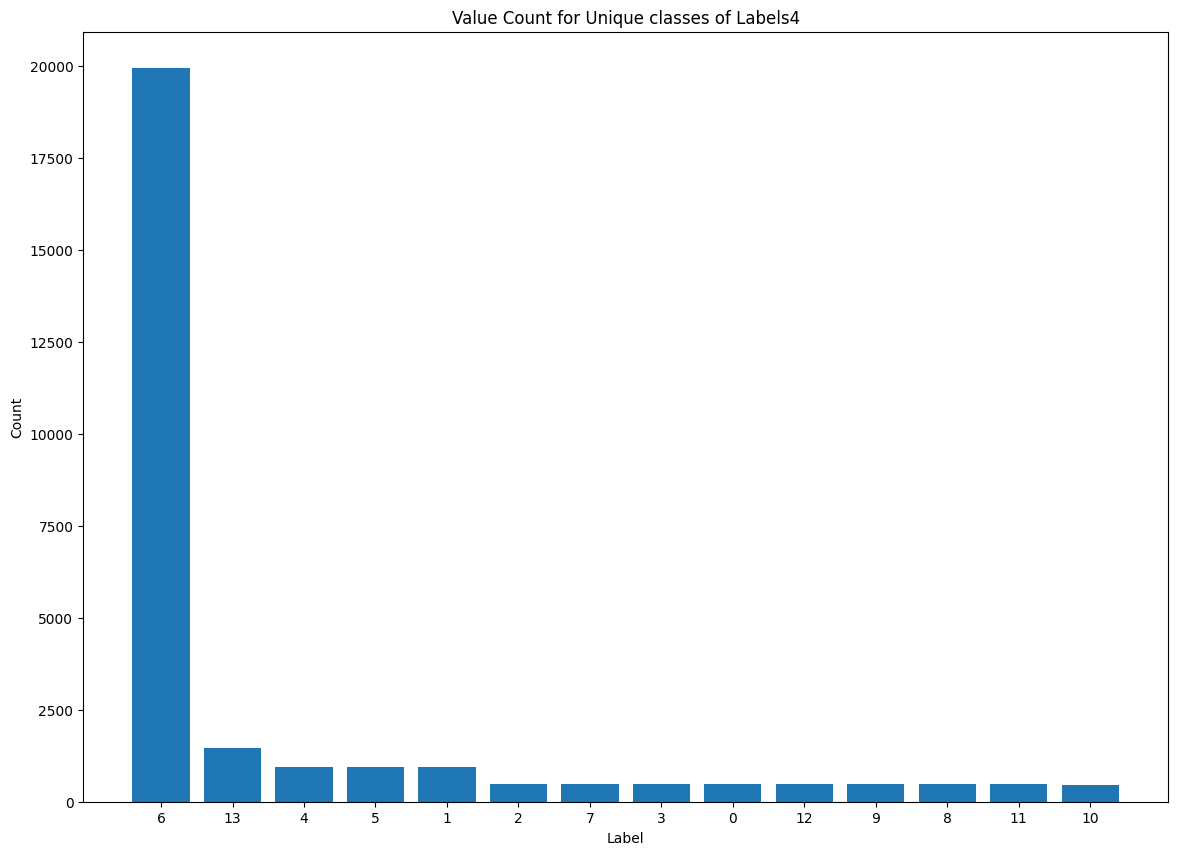

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
unique_labels = df_clean['label_4'].unique()
unique_labels=unique_labels.astype(str)
label_counts = df_clean['label_4'].value_counts()

plt.bar(unique_labels, label_counts)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Count for Unique classes of Labels4')

# Show the plot
plt.show()

In [20]:
df_clean.shape

(28520, 259)

In [21]:
df_clean.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,1,6


In [22]:
correlation_df =df_clean.corr()

<Axes: >

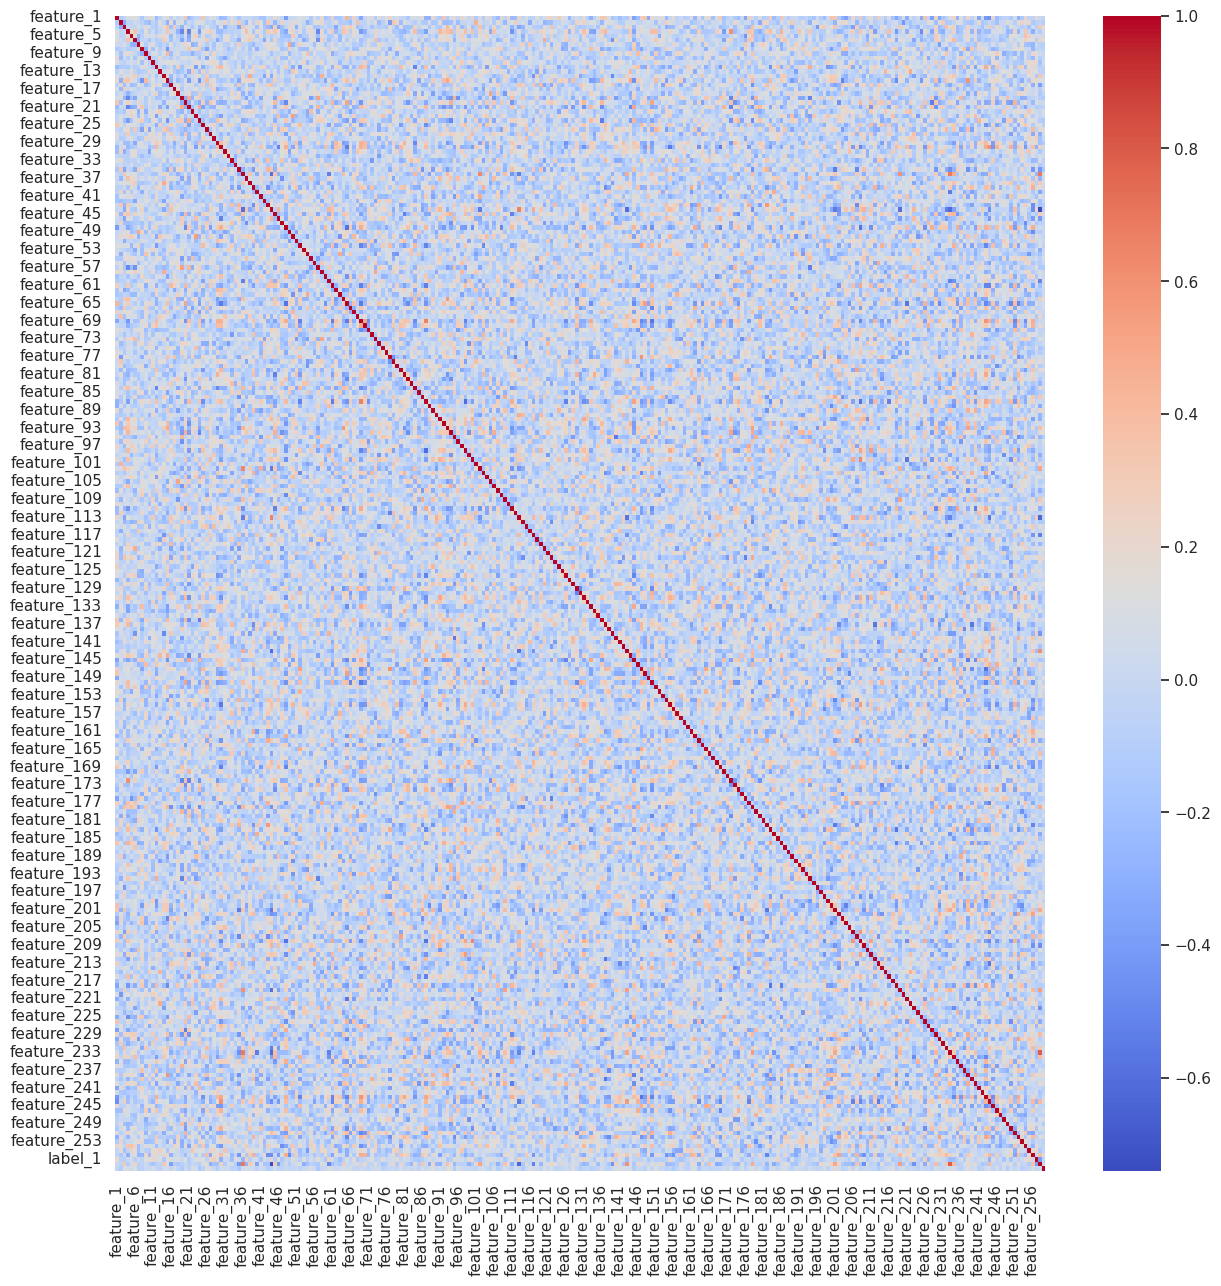

In [23]:
#correlation matrix
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlation_df, annot = False, fmt='.2g',cmap= 'coolwarm')

**Filtering method**

In [24]:
df_clean.shape

(28520, 259)

In [25]:
df_clean.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,1,6


In [26]:
data= df_clean.values
X=data[:,0:256]
Y_1=np.array(data[:,256])
l_1=np.asarray(Y_1, dtype = 'int')
l_3=data[:,257]
l_4=data[:,258]

In [27]:
from re import L
test_val = test.values
test_X=test_val[:,0:256]
l_test1=np.array(test_val[:,256])
l_test1=np.asarray(l_test1, dtype = 'int')
l_test2=np.array(test_val[:,257])
l_test2=np.asarray(l_test2, dtype = 'int')
l_test3=np.array(test_val[:,258])
l_test3=np.asarray(l_test3, dtype = 'int')
l_test4=np.array(test_val[:,259])
l_test4=np.asarray(l_test4, dtype = 'int')

In [28]:
valid_val =valid_original.values
valid_X=valid_val[:,0:256]
l_valid1=np.array(valid_val[:,256])
l_valid1=np.asarray(l_valid1, dtype = 'int')
l_valid2=np.array(valid_val[:,257])
l_valid2=np.asarray(l_valid2, dtype = 'int')
l_valid3=np.array(valid_val[:,258])
l_valid3=np.asarray(l_valid3, dtype = 'int')
l_valid4=np.array(valid_val[:,259])
l_valid4=np.asarray(l_valid4, dtype = 'int')

In [29]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


##Before feature engineering

In [30]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

In [31]:
def randomForest_without_feature_engineering(X,Y,valid_X,l_valid,test_X,isAccuracy):
  # Training the classifier
  clf = RandomForestClassifier(random_state=50)
  clf.fit(X, Y)
  # Making predictions from the valid data sets
  pred_Y = clf.predict(valid_X)
  # Making predictions from the test data sets
  test_Y = clf.predict(test_X)
  #calculating the accuracy or the F score based on isAccuracy
  if(isAccuracy):
    accuracy = accuracy_score(l_valid, pred_Y)
    print("Accuracy:", accuracy)
  else:
    accuracy = f1_score(l_valid, pred_Y,average='micro')
    print("F score:", accuracy)
  return test_Y


###Label-1

In [32]:
Y_pred_test1= randomForest_without_feature_engineering(X,l_1,valid_X,l_valid1,test_X,True)

Accuracy: 0.9693333333333334


###Label-2

In [33]:
# Dropping rows with missing value
df_clean1 = train_original.dropna()
df_clean1.reset_index(drop = True, inplace = True)
data1= df_clean1.values
l_2 = data1[:,257]
X1 = data1[:,0:256]

In [34]:
# Dropping rows with missing value
valid1 = valid_original.dropna()
valid1.reset_index(drop = True, inplace = True)
valid_dataset1= valid1.values
Y_valid2 = valid_dataset1[:,257]
X_valid1 = valid_dataset1[:,0:256]

In [35]:
Y_pred_test2= randomForest_without_feature_engineering(X1,l_2,X_valid1,Y_valid2,test_X,False)

F score: 0.9225543478260869


###Label-3

In [36]:
Y_pred_test3= randomForest_without_feature_engineering(X,l_3,valid_X,l_valid3,test_X,False)

F score: 0.996


###Label-4

In [37]:
Y_pred_test4= randomForest_without_feature_engineering(X,l_4,valid_X,l_valid4,test_X,False)

F score: 0.8546666666666667


##After Feature Engineering

In [38]:
def CustomRandomForest(X,Y,l_valid,valid_val,test,test_Y,df_clean,isAccuracy,score=0.0027,lableDropList=['label_1','label_2','label_3','label_4']):
  train_X=''
  featureNames = [f"feature_{i+1}" for i in range(X.shape[1])]
  forest = RandomForestClassifier(random_state=100)
  forest.fit(X, Y)
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
  foresImportances = pd.Series(importances, index=featureNames)
  dropListof_feature_label=[]

  for key,value  in foresImportances.items():
    if(value<score):
      dropListof_feature_label.append(key)
  valid_label_X =dropListof_feature_label.copy()
  valid_label_X.extend(lableDropList)
  print("number of features dropped :",len(dropListof_feature_label))
  train_label_X=df_clean
  train_label_X = df_clean.drop(columns=dropListof_feature_label)

  if 'label_2' not in train_label_X:
    train_X = train_label_X.drop(columns=['label_1','label_3','label_4'])
  else :
    train_X = train_label_X.drop(columns=['label_1','label_2','label_3','label_4'])
  train_Y = Y
  valid_X = valid_val.drop(columns=valid_label_X)
  test_X = test.drop(columns=valid_label_X)
  scaled_train_X , scaled_valid_X , scaled_test_X = val_scaler(train_X,valid_X,test_X)
  # Training the classifier
  clf = RandomForestClassifier(random_state=50)
  clf.fit(scaled_train_X, train_Y)
  # Making predictions on test data sets
  pred_test_Y = clf.predict(scaled_test_X)
  # Making predictions on  valid data sets
  pred_valid_Y = clf.predict(scaled_valid_X)
  output ={}
  output['Predicted labels before feature engineering']= test_Y
  output['Predicted labels after feature engineering']= pred_test_Y
  output['No of new features']=['' for j in range(scaled_test_X.shape[0])]
  for i in  range(0,256) :
    col_name="new_feature_"+str(i+1)
    if(i<scaled_test_X.shape[1]):
      output[col_name] = scaled_test_X[:,i]
    else:
      output[col_name]=[0 for j in range(scaled_test_X.shape[0])]
 #calculating the accuracy or the F score based on isAccuracy
  if(isAccuracy):
    accuracy = accuracy_score(l_valid, pred_valid_Y)
    print("Accuracy:", accuracy)
  else:
    accuracy = f1_score(l_valid, pred_valid_Y,average='micro')
    print("F score:", accuracy)
  df = pd.DataFrame(output)
  df['No of new features'] = scaled_test_X.shape[1]
  return df

In [39]:
from sklearn.preprocessing import StandardScaler
# Standardizing data
def val_scaler(train_X,valid_X,test_X):
  scaler = StandardScaler()
  scaled_train_X = scaler.fit_transform(train_X)
  scaled_valid_X = scaler.transform(valid_X)
  scaled_test_X = scaler.transform(test_X)
  return scaled_train_X,scaled_valid_X,scaled_test_X

In [40]:
from google.colab import files
def download_data_to_csv(data,filename):
  """ Downloading data to a csv file"""
  filename= filename + '.csv'
  data.to_csv(filename, encoding = 'utf-8-sig',index= False)
  files.download(filename)

**Label_1**

In [41]:
data_label_1 =CustomRandomForest(X,l_1,l_valid1,valid,test,Y_pred_test1,df_clean,True,score=0.003)

number of features dropped : 28
Accuracy: 0.9706666666666667


In [42]:
download_data_to_csv(data_label_1,'190177F_label_1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Label_2**

In [43]:
df_clean1['label_2'].unique()

array([25., 27., 23., 33., 34., 22., 30., 26., 24., 31., 29., 61., 28.,
       36., 32., 35., 41.])

In [44]:
data_label_2 = CustomRandomForest(X1,l_2,Y_valid2,valid1,test,Y_pred_test2,df_clean1,False,score=0.0025)

number of features dropped : 1
F score: 0.9279891304347826


In [45]:
download_data_to_csv(data_label_2,'190177F_label_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Label_3**

In [46]:
data_label_3 = CustomRandomForest(X,l_3,l_valid3,valid,test,Y_pred_test1,df_clean,False,score=0.0006)

number of features dropped : 102
F score: 0.9986666666666667


In [47]:
download_data_to_csv(data_label_3,'190177F_label_3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Label_4**

In [48]:
data_label_4=CustomRandomForest(X,l_4,l_valid4,valid,test,Y_pred_test4,df_clean,False,score=0.0019)

number of features dropped : 0
F score: 0.8546666666666667


In [49]:
download_data_to_csv(data_label_4,'190177F_label_4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>